# Data preprocessing and visualization with the Fashion MNIST Dataset

In this notebook we will be going through the tasks to preprocess the Fashion MNIST dataset and to visualize it. Just like in the previous notebooks, we will be going through a step by step process for the preparation of the dataset for modelling. 


## Context

Why do we need data preprocessing in the first place? Well, the answer is simple. We need to ensure that the data is present with the qualities that we need from it for modelling. What have we discussed so far?

1. Visualization helps us understand the data better.
2. Removing Erroneous data allows us to pass the data for training without any issues.




In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

raw_data_train = pd.read_csv("/content/drive/My Drive/NB3/FMNIST/fashion-mnist_train.csv")
raw_data_test = pd.read_csv('/content/drive/My Drive/NB3/FMNIST/fashion-mnist_test.csv')


## 1. Visualization

### Task 1
Lets try one example task. Given our dataset, try to use matplotlib to print out one image in grayscale. 

In [1]:
#ANSWER
image_resized = np.resize(raw_data_train.iloc[0,1:].values,(28,28))
plt.imshow(image_resized, cmap='gray', interpolation='none')
plt.show()

NameError: ignored

### Task 2
Now try to print out 12 images with the labels for the images in a grid form.

In [1]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12,9))
for i in range(0,12):
    plt.subplot(3,4,i+1)
    #ANSWER
    image_resized = np.resize(raw_data_train.iloc[i,1:].values,(28,28))
    plt.title(class_names[raw_data_train.iloc[i,0]])
    plt.imshow(image_resized, cmap='gray', interpolation='none')
    
    plt.axis('off')
plt.show()

NameError: ignored

### Task 3
For this next task, your goal is to take a subset of 500 images from the dataset and to plot it as a histogram. The X-axis should be values for each pixel and Y-axis should be their frequencies. Use 256 bins.

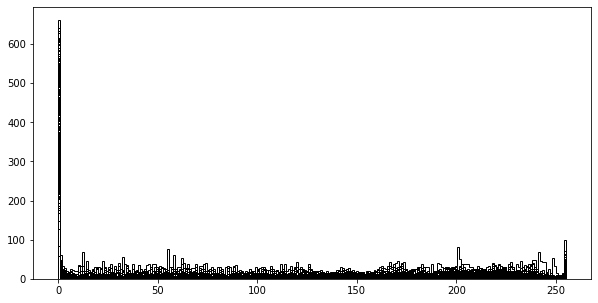

In [ ]:
subset_1 = raw_data_train.iloc[:500,1:]
plt.subplots(figsize=(10,5))
plt.hist(subset_1, bins=256,histtype='step')
plt.show()

## 2. Data preprocessing

Our aim is to create 6 data variables.
1. Training set (X, Y)
2. Validation set (X, Y)
3. Testing set (X, Y)

Why do we split the data into training and validation sets?

Remember, in the supervised learning problem, we feed our training set (comprises of our selected features and the target) to our learning function. It will then create a model based on the training set.

The validation set is subsequently used to test the model's prediction to see how the model performs.

For more information, head over to https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6.

Do read the section on 'What is Overfitting/Underfitting a Model?' to get more information on why we split test and training sets and its effects if we overfit or underfit a model.

Let's implement the code by calling the train_test_split function. We are going to split the train set to be 80% of the data and the validation set to be 20% of the data.

In [ ]:
X = np.array(raw_data_train.iloc[:, 1:])
y = pd.get_dummies(np.array(raw_data_train.iloc[:, 0]))

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=12)

Now that we have extracted the Training, testing and validation data we need to perform certain changes to it. But before we go through with them we need to define the following variables.

1. im_rows <-- image rows
2. im_cols <-- image columns
3. input_shape <-- a tuple containing the input shape for the training process.

In [ ]:
# ANSWER
im_rows, im_cols = 28, 28
input_shape = (im_rows, im_cols, 1)

The input_shape variable might be a little tricky to understand. Why is it shaped the way it is?

In [ ]:
# ANSWER
The input_shape variable is shaped the way it is to highlight the 3 dimensions an image can have. 
Since our images are grayscale the images will have dimensions of 
(image width, image length, 1)

SyntaxError: invalid syntax (<ipython-input-9-bc5c17948c59>, line 2)

For this next section you will be challenged to follow the code that we had followed before to create dummies for the 'y_test' variable and create a numpy array for the 'x_test' variable.

In [ ]:
# Test data
X_test = np.array(raw_data_test.iloc[:, 1:])
y_test = pd.get_dummies(np.array(raw_data_test.iloc[:, 0]))

### Task
Use the numpy reshaping function to reshape our data to be 4 dimensions. 
1. Number of images
2. Image height
3. Image width
4. Number of channels(1)

In [2]:
# ANSWER
# train and validate sets
X_train = X_train.reshape(X_train.shape[0], im_rows, im_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], im_rows, im_cols, 1)
X_test = X_test.reshape(X_test.shape[0], im_rows, im_cols, 1)


NameError: ignored

### Normalization

The next topic we will be covering is normalization. It is something that is used to get rid of distortion in images and provide a better result in the machine learning process. Upon searching the web for normalization it is easy to get confused by the large number of terms and ideas surrounding it. 

Check this link for more details https://datascience.stackexchange.com/questions/29958/when-inputting-image-rgb-values-to-mlp-should-i-divide-by-255.

### Task

Perform normalization for the data variables (X_train, X_validate, X_test) by dividing each value by 255. What does this leave you with?

In [ ]:
# normalisation
X_train = X_train/255
X_validate = X_validate/255
X_test = X_test/255

In [ ]:
print("X_train shape:", X_train.shape)
print("X_validate shape:", X_validate.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_validate shape:", y_validate.shape)
print("y_test shape:", y_test.shape)

X_train shape: (48000, 28, 28, 1)
X_validate shape: (12000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (48000, 10)
y_validate shape: (12000, 10)
y_test shape: (10000, 10)


Congratulation!! That is the end of this notebook :)